Census Income Project

Given the data of citizens, we have to understand the data extensively, perform EDA to better understand the features and predict if an individual's income is above 50k or no by using the relevant features

Importing the necessary libraries

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# Visualizations
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv")

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.shape


(32560, 15)

#Mapping binary values to the expected output

df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [6]:
#Replacing question marks in dataset with null values

df.replace('?',np.nan )

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
#Finding what percentage of data is missing from the dataset

total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Age,0,0.0
Workclass,0,0.0
Fnlwgt,0,0.0
Education,0,0.0
Education_num,0,0.0


In [11]:
# Since a very small amount of data is missing, we can replace the null values with the mode of each column

df['Occupation'].describe()

count               32560
unique                 15
top        Prof-specialty
freq                 4140
Name: Occupation, dtype: object

In [21]:
#Since mode is Prof-specialty, replacing null values with it

df['Occupation'] = df['Occupation'].fillna('Prof-specialty')

In [22]:
df['Workclass'].describe()


count        32560
unique           9
top        Private
freq         22696
Name: Workclass, dtype: object

In [23]:
#Since mode is Private, replacing null values with it

df['Workclass'] = df['Workclass'].fillna('Private')

In [ ]:
df['native.country'].describe()

In [ ]:
#Since mode is United-States, replacing null values with it

df['native.country'] = df['native.country'].fillna('United-States')

In [30]:
#Mean, Median, Minimum , Maximum values etc can be found

df.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [31]:
df.describe(include=["O"])


,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27815,21789,29169,24719


In [ ]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset

rcParams['figure.figsize'] = 12, 12
df[['Age', 'Fnlwgt', 'Workclass', 'Education', 'Education_num', 'Hours.per.week']].hist()

#Can visualise that data such as capital gain, capitaln loss, fnlwgt is right skewed an other columns can be grouped for better visualisation

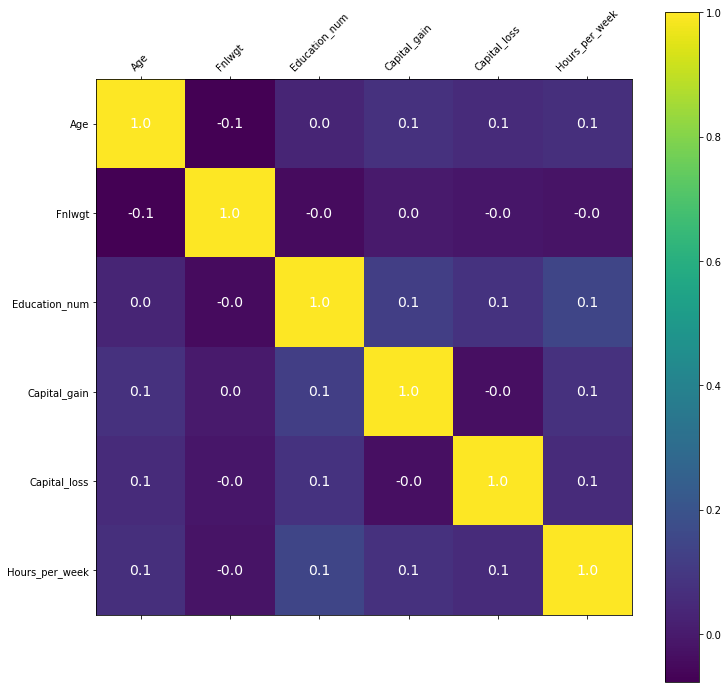

In [35]:
#Ploting the correlation between the output(income) and individual features

plt.matshow(df.corr())
plt.colorbar()
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

In [37]:
#Since it has 0 correlation, it can be dropped

df.drop(['Fnlwgt'], axis = 1, inplace = True)

In [38]:
dataset=df.copy()


In [41]:
#Distributing Age column in 3 significant parts and plotting it corresponding to the output feature(income)

dataset['Age'] = pd.cut(dataset['Age'], bins = [0, 25, 50, 100], labels = ['Young', 'Adult', 'Old'])


<AxesSubplot:xlabel='Income', ylabel='count'>

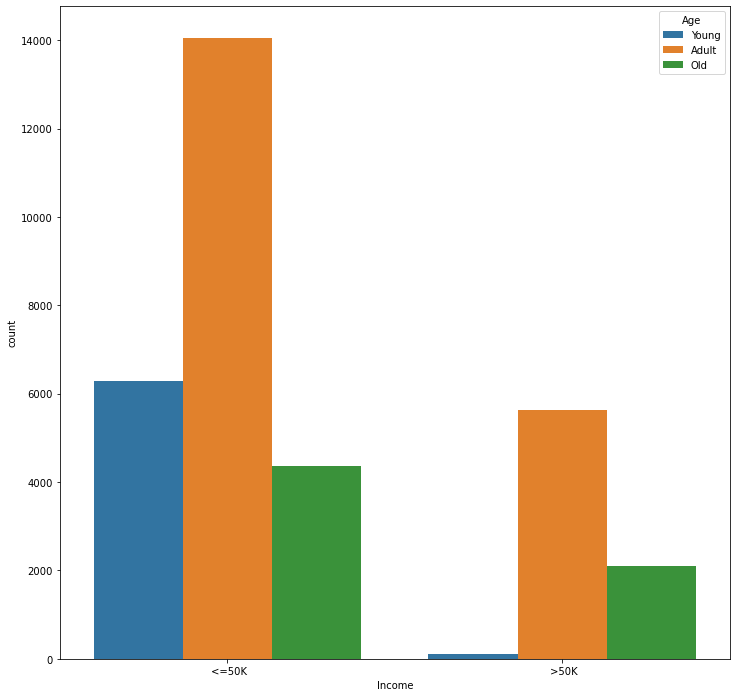

In [42]:
sns.countplot(x = 'Income', hue = 'Age', data = dataset)


In [ ]:
#Capital gain and capital loss can be combined and transformed into a feature capital difference. Plotting the new feature corresponding to income

dataset['Capital Diff'] = dataset['Capital.gain'] - dataset['Capital.loss']
dataset.drop(['Capital.gain'], axis = 1, inplace = True)
dataset.drop(['Capital.loss'], axis = 1, inplace = True)

In [ ]:
dataset['Capital Diff'] = pd.cut(dataset['Capital Diff'], bins = [-5000, 5000, 100000], labels = ['Minor', 'Major'])
sns.countplot(x = 'Income', hue = 'capital Diff', data = dataset)

In [ ]:
#Dividing hours of week in 3 major range and plotting it corresponding to the income

dataset['Hours per Week'] = pd.cut(dataset['hours.per.week'], 
                                   bins = [0, 30, 40, 100], 
                                   labels = ['Lesser Hours', 'Normal Hours', 'Extra Hours'])

In [ ]:
sns.countplot(x = 'Income', hue = 'Hours per Week', data = dataset)

<AxesSubplot:xlabel='Income', ylabel='count'>

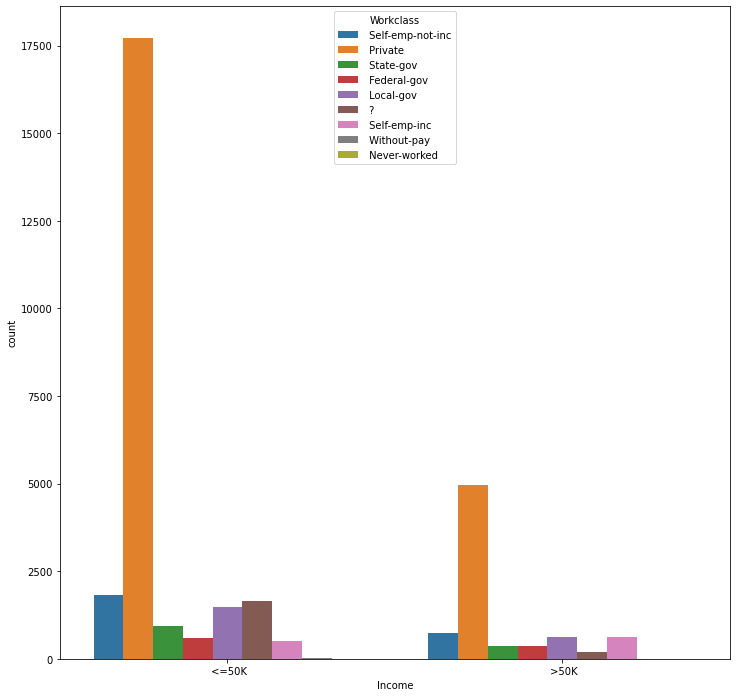

In [51]:
#Plotting workclass corresponding to the income

sns.countplot(x = 'Income', hue = 'Workclass', data = dataset)

<AxesSubplot:xlabel='Income', ylabel='count'>

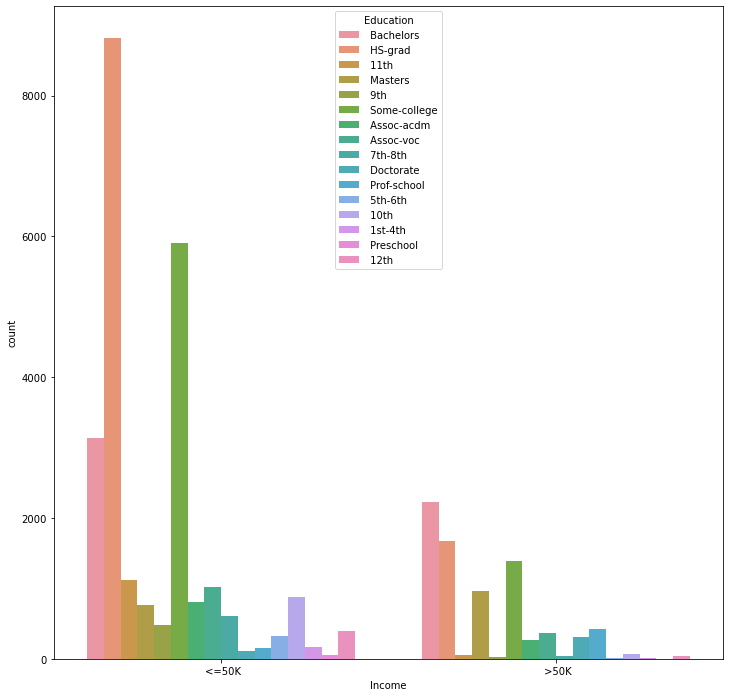

In [55]:
#Plot of education corresponding to income

sns.countplot(x = 'Income', hue = 'Education', data = dataset)

In [ ]:
#Combining the lower grades of education together

df.drop(['Education.num'], axis = 1, inplace = True)
df['education'].replace(['11th', '9th', '7th-8th', '5th-6th', '10th', '1st-4th', 'Preschool', '12th'],
                             ' School', inplace = True)
df['Education'].value_counts()

<AxesSubplot:xlabel='Income', ylabel='count'>

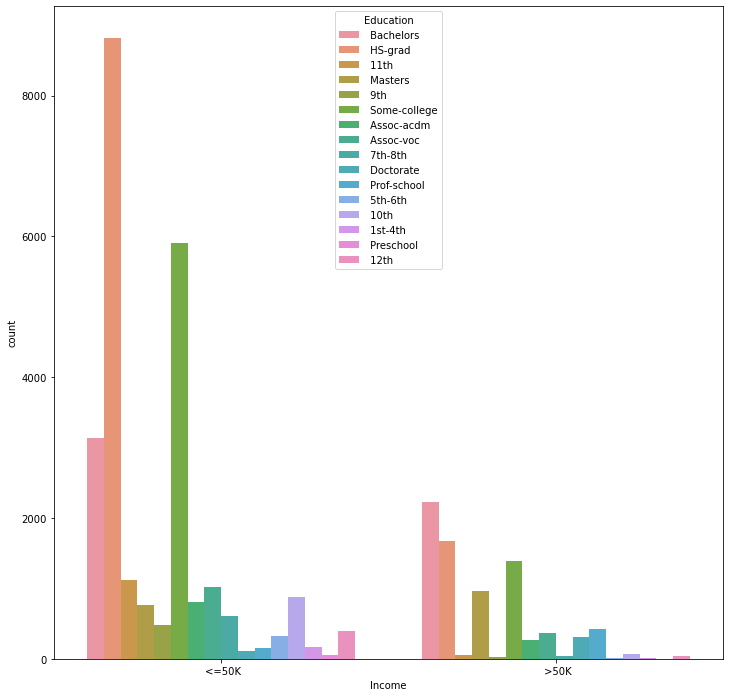

In [59]:
sns.countplot(x = 'Income', hue = 'Education', data = df)

<AxesSubplot:xlabel='Income', ylabel='count'>

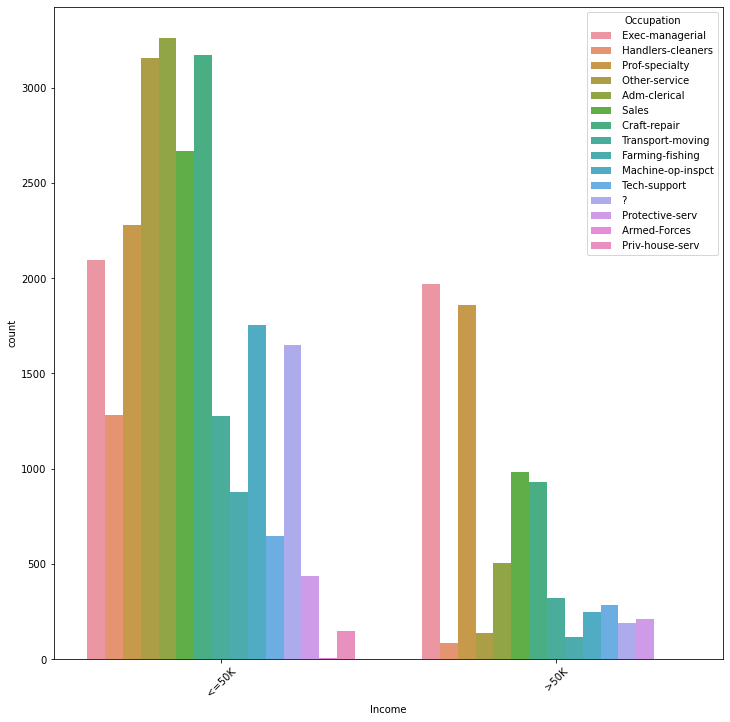

In [60]:
#Plot of occupation corresponding to the income

plt.xticks(rotation = 45)
sns.countplot(x = 'Income', hue = 'Occupation', data = dataset)

<AxesSubplot:xlabel='Income', ylabel='count'>

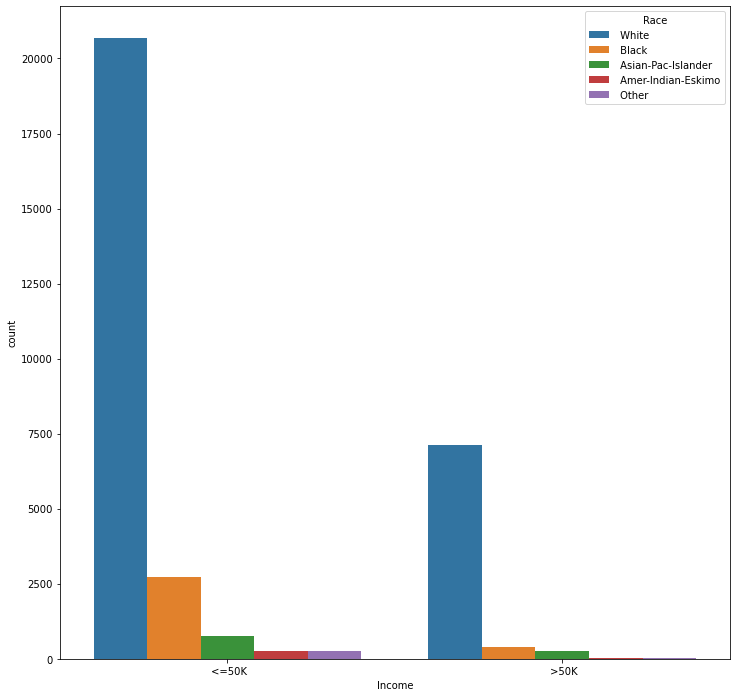

In [61]:
sns.countplot(x = 'Income', hue = 'Race', data = dataset)


In [62]:
#Since majority of race is white, the rest of races can be combined together to form a new group

df['Race'].unique()
df['Race'].replace(['Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],' Other', inplace = True)

<AxesSubplot:xlabel='Income', ylabel='count'>

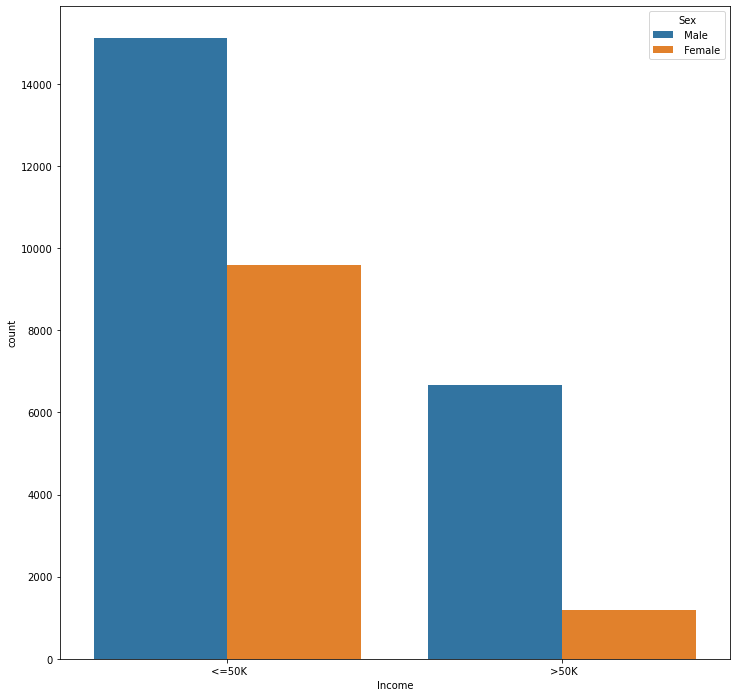

In [63]:
#Plot of sex corresponding to income

sns.countplot(x = 'Income', hue = 'Sex', data = dataset)


In [ ]:
count = dataset['Native.Country'].value_counts()
count

In [ ]:
#Plot of Country corresponding to income


plt.bar(count.index, count.values)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Count from each Country')


In [ ]:
#Combining all other into one class

countries = np.array(dataset['native.country'].unique())
countries = np.delete(countries, 0)

In [ ]:
dataset['native.country'].replace(countries, 'Other', inplace = True)
df['native.country'].replace(countries, 'Other', inplace = True)

In [ ]:
sns.countplot(x = 'native.country', hue = 'income', data = dataset)


In [70]:
#Splitting the data set into features and outcome

X = df.drop(['Income'], axis=1)
Y = df['Income']

In [71]:
X.head()


,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [72]:
#Splitting the data into test data and training data

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [76]:
from sklearn import preprocessing

categorical = ['Workclass','Education',  'Occupation', 'Relationship','Race', 'Sex']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

<ipython-input-76-d2dadc71bbc4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[feature] = le.fit_transform(X_train[feature])
<ipython-input-76-d2dadc71bbc4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[feature] = le.transform(X_test[feature])


In [ ]:
#Using StandardScalar to normalise the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [78]:
X_train.head()


,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
20721,32,5,15,10,Married-civ-spouse,14,0,2,1,0,0,35,Haiti
32097,45,4,11,9,Married-civ-spouse,3,0,4,1,7298,0,60,United-States
25205,47,7,11,9,Divorced,1,4,4,0,1831,0,38,United-States
23491,37,4,9,13,Never-married,5,1,4,1,0,0,30,United-States
12367,24,4,15,10,Never-married,1,3,4,1,0,0,40,India


In [ ]:
#Applying the random forest algorithm

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the Logistic Regression algorithm

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train) 
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the GaussianNB algorithm

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the Support Vector Machine algorithm

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

In [ ]:
#Applying the Decision Tree algorithm

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

In [ ]:
#Plotting the accuracy of the used algorithms to find the best fit

results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 'Random Forest', 'Naive Bayes', 'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(7)

In [ ]:
#Finding significance of each feature in t5he best fit model

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
#Plotting the significance of each feautre

importances.Plot.bar()

In [ ]:
#Since they hardly have any significance, can drop these columns to avoid overfitting

df  = df.drop("Sex", axis=1)
df  = df.drop("Race", axis=1)
df  = df.drop("native.country", axis=1)

#The accuracy remains the same even after dropping the columns

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

Thus, in this project, we cleaned the data, carried out EDA extensively and understood all the parameters in this process and successfully applied multiple classification algorithms to predict the required output.